In [5]:
from openai import OpenAI
from Cosmogent import Cosmogents
import os
from dotenv import load_dotenv


In [ ]:



cosmo_sim = Cosmogents(api_key="", N_PLANNING_ROUNDS=5, model="gpt-4o-mini")

cosmo_sim.create_vector_store()

cosmo_sim.create_agent(temperature=0.2)



Creating vector stores...

Processing Coding store...
Files to upload:
 - cintegrate.md
 - error_propagation.md
 - cpderivative.md
 - solve_ode.md
 - fourier_transform.md
 - age_of_universe.md
 - proper_dist.md
 - comoving_dist.md
 - cdensity.md
 - conf_time.md
 - critical_density.md
 - redshift_conversion.md
 - cosmo_constants.md
 - cflrw.md
Successfully uploaded 14 files to Coding store
File batch status: completed

Processing planck store...
Files to upload:
 - Planck2018_Paper_Table4.md
 - Planck2018_Paper_Table5.md
 - Planck2018_Paper_Table1.md
 - Planck2018_Paper_Table11.md
 - Planck2018_Paper_Table10.md
 - Planck2018_Paper_Table8.md
 - Planck2018_Paper_Table9.md
 - Planck2018_Paper_Table6.md
 - Planck2018_Paper_Table2.md
 - Planck2018_Paper_Table3.md
 - Planck2018_Paper_Table7.md
Successfully uploaded 11 files to planck store
File batch status: completed

Processing theory store...
Files to upload:
 - Statistical_Physics--Tong.pdf
 - Physics of Light and Optics -- Peatross & War

/Users/tanayvajhala/Desktop/ag2/ag2_Cosmo/.venv/lib/python3.11/site-packages/autogen/agentchat/conversable_agent.py:113: UserWarning: Update function string contains no variables. This is probably unintended.
  warnings.warn("Update function string contains no variables. This is probably unintended.")


Created 3 RAG assistants
Created 4 main agents and 3 RAG assistants


In [5]:
prompt = """Here's a more specific prompt that addresses the physics issues:
Model the expansion of a radiation-dominated universe from a scale factor of 1e-14 to present day (a=1). Use the full Friedmann equation with proper density scaling. Make reasonable assumptions.
 Use all density parameters, and scale them back approptiately, with consideration of critical denisty.
 I want you to integrate over time, not scale factor.
 You should consider how da/dt and a change over time aswell as H, so you must integrate over time itself. not scale factor."""

chat_result, context_vars, last_agent = cosmo_sim.execute(user_prompt=prompt)

print("Chat Result:")
print(chat_result)


_User (to chat_manager):

Here's a more specific prompt that addresses the physics issues:
Model the expansion of a radiation-dominated universe from a scale factor of 1e-14 to present day (a=1). Use the full Friedmann equation with proper density scaling. Make reasonable assumptions.
 Use all density parameters, and scale them back approptiately, with consideration of critical denisty.
 I want you to integrate over time, not scale factor.
 You should consider how da/dt and a change over time aswell as H, so you must integrate over time itself. not scale factor.

--------------------------------------------------------------------------------

Next speaker: Planner

Planner (to chat_manager):

{"response":"**Part 0**  \nModel the expansion of a radiation-dominated universe from a scale factor of 1e-14 to present day (a=1). Use the full Friedmann equation with proper density scaling. Make reasonable assumptions. Use all density parameters, and scale them back appropriately, with conside

Coder


>>>>>>>> EXECUTED FUNCTION record_step...
Call ID: call_C4lJ1vcszeYERIVtL8uSyTps
Input arguments: {'agent_choice': 'Coder'}
Output:
Please review the plan and provide feedback.
_Group_Tool_Executor (to chat_manager):

***** Response from calling tool (call_C4lJ1vcszeYERIVtL8uSyTps) *****
Please review the plan and provide feedback.
**********************************************************************

--------------------------------------------------------------------------------

Next speaker: Reviewer

Removed 3 messages. Number of messages reduced from 4 to 1.
Reviewer (to chat_manager):

{"response":"To proceed with the review of the plan for modeling the expansion of a radiation-dominated universe, I will first conduct a vector store search to validate all referenced data, equations, and constants. This is crucial to ensure scientific accuracy and consistency with cosmological models."}

--------------------------------------------------------------------------------

Next spea

Coder


>>>>>>>> EXECUTED FUNCTION record_step...
Call ID: call_DGC4QTb1lQdxtLOVEuxQuqvd
Input arguments: {'agent_choice': 'Coder'}
Output:
Please update the plan based on the review.
_Group_Tool_Executor (to chat_manager):

***** Response from calling tool (call_DGC4QTb1lQdxtLOVEuxQuqvd) *****
Please update the plan based on the review.
**********************************************************************

--------------------------------------------------------------------------------

Next speaker: Planner

Removed 7 messages. Number of messages reduced from 9 to 2.
Planner (to chat_manager):

{"response":"**Part 0**  \nModel the expansion of a radiation-dominated universe from a scale factor of 1e-14 to present day (a=1). Use the full Friedmann equation with proper density scaling. Make reasonable assumptions. Use all density parameters, and scale them back appropriately, with consideration of critical density. I want you to integrate over time, not scale factor. You should consider how 

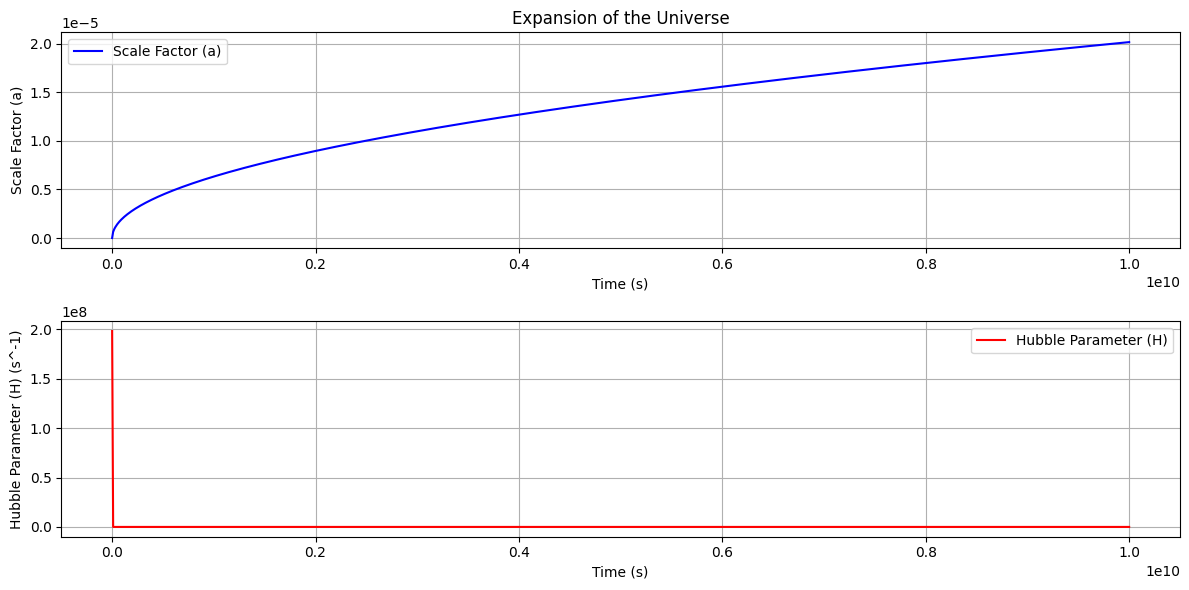

In [7]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint

# Constants
G = 6.67430e-11  # Gravitational constant in m^3 kg^-1 s^-2
H0 = 67.4 * 1000 / (3.086e22)  # Hubble constant in s^-1 (from km/s/Mpc)
Omega_m = 0.315  # Matter density parameter
Omega_r = 8.24e-5  # Radiation density parameter
Omega_lambda = 0.685  # Dark energy density parameter

# Critical density calculation
rho_c = 3 * H0**2 / (8 * np.pi * G)  # Critical density in kg/m^3

# Function to compute the Friedmann equation
def friedmann_equation(a, t, params):
    """Compute the rate of change of scale factor with respect to time.
    Args:
        a (float): Current scale factor (dimensionless).
        t (float): Current time (seconds).
        params (dict): Dictionary containing cosmological parameters.
    Returns:
        float: Rate of change of scale factor (da/dt).
    """
    Omega_m, Omega_r, Omega_lambda = params['Omega_m'], params['Omega_r'], params['Omega_lambda']
    rho_total = Omega_m * rho_c * (1 / a**3) + Omega_r * rho_c * (1 / a**4) + Omega_lambda * rho_c
    H = np.sqrt((8 * np.pi * G / 3) * rho_total)  # Hubble parameter
    da_dt = a * H  # Rate of change of scale factor
    return da_dt

# Function to integrate the expansion
def integrate_expansion(t_start, t_end, params, a_initial=1e-14):
    """Integrate the expansion of the universe from t_start to t_end.
    Args:
        t_start (float): Start time (seconds).
        t_end (float): End time (seconds).
        params (dict): Cosmological parameters.
        a_initial (float): Initial scale factor.
    Returns:
        np.ndarray: Array of time, scale factor, and Hubble parameter values.
    """
    # Time array
    t = np.linspace(t_start, t_end, 1000)
    # Initial conditions
    a0 = a_initial
    # Solve ODE
    a_values = odeint(friedmann_equation, a0, t, args=(params,))
    return t, a_values.flatten()

# Function to plot results
def plot_results(t, a_values):
    """Plot the scale factor and Hubble parameter against time.
    Args:
        t (np.ndarray): Time array.
        a_values (np.ndarray): Scale factor values.
    """
    plt.figure(figsize=(12, 6))
    plt.subplot(2, 1, 1)
    plt.plot(t, a_values, label='Scale Factor (a)', color='blue')
    plt.title('Expansion of the Universe')
    plt.xlabel('Time (s)')
    plt.ylabel('Scale Factor (a)')
    plt.grid()
    plt.legend()

    # Calculate Hubble parameter for plotting
    H_values = np.sqrt((8 * np.pi * G / 3) * (Omega_m * rho_c * (1 / a_values**3) + Omega_r * rho_c * (1 / a_values**4) + Omega_lambda * rho_c))
    plt.subplot(2, 1, 2)
    plt.plot(t, H_values, label='Hubble Parameter (H)', color='red')
    plt.xlabel('Time (s)')
    plt.ylabel('Hubble Parameter (H) (s^-1)')
    plt.grid()
    plt.legend()
    plt.tight_layout()
    plt.show()

# Main execution
if __name__ == '__main__':
    # Time range for integration
    t_start = 1e-10  # Start time in seconds
    t_end = 1.0e10  # End time in seconds (approx present day)
    params = {'Omega_m': Omega_m, 'Omega_r': Omega_r, 'Omega_lambda': Omega_lambda}
    t, a_values = integrate_expansion(t_start, t_end, params)
    plot_results(t, a_values)

In [6]:
prompt = """Create a physically accurate Gaussian random field simulation that models primordial density fluctuations in the early universe at redshift z~1100 (recombination epoch). The simulation should incorporate the correct cosmological power spectrum based on Planck 2018 measurements, including the proper spectral index, amplitude, and matter density parameters. Ensure the field represents realistic density contrasts (δρ/ρ) that would have seeded the formation of large-scale structure we observe today. The model should account for the scale-invariant nature of primordial fluctuations as predicted by inflation theory, with appropriate normalization to match cosmic microwave background observations."""

chat_result, context_vars, last_agent = cosmo_sim.execute(user_prompt=prompt)

print("Chat Result:")
print(chat_result)


_User (to chat_manager):

Create a physically accurate Gaussian random field simulation that models primordial density fluctuations in the early universe at redshift z~1100 (recombination epoch). The simulation should incorporate the correct cosmological power spectrum based on Planck 2018 measurements, including the proper spectral index, amplitude, and matter density parameters. Ensure the field represents realistic density contrasts (δρ/ρ) that would have seeded the formation of large-scale structure we observe today. The model should account for the scale-invariant nature of primordial fluctuations as predicted by inflation theory, with appropriate normalization to match cosmic microwave background observations.

--------------------------------------------------------------------------------

Next speaker: Planner

Planner (to chat_manager):

{"response":"**Part 0**\nCreate a physically accurate Gaussian random field simulation that models primordial density fluctuations in the ea

Coder


>>>>>>>> EXECUTED FUNCTION record_step...
Call ID: call_WlDyoghugeIflScGfZD1h5Rw
Input arguments: {'agent_choice': 'Coder'}
Output:
Please review the plan and provide feedback.
_Group_Tool_Executor (to chat_manager):

***** Response from calling tool (call_WlDyoghugeIflScGfZD1h5Rw) *****
Please review the plan and provide feedback.
**********************************************************************

--------------------------------------------------------------------------------

Next speaker: Reviewer

Removed 3 messages. Number of messages reduced from 4 to 1.
Reviewer (to chat_manager):

{"response":"### Review of the Gaussian Random Field Simulation Plan\n\n#### Vector Store Search\nBefore proceeding with the review, I will conduct a vector store search to validate all referenced data, equations, and constants against the vector store. This includes checking the Planck 2018 measurements, cosmological parameters, and any equations used in the simulation.\n\n#### Code Part 1 (Str

Coder


>>>>>>>> EXECUTED FUNCTION record_step...
Call ID: call_Bx2HHeIvdvEiyrr0whwdOBoU
Input arguments: {'agent_choice': 'Coder'}
Output:
Please update the plan based on the review.
_Group_Tool_Executor (to chat_manager):

***** Response from calling tool (call_Bx2HHeIvdvEiyrr0whwdOBoU) *****
Please update the plan based on the review.
**********************************************************************

--------------------------------------------------------------------------------

Next speaker: Planner

Removed 7 messages. Number of messages reduced from 9 to 2.
Planner (to chat_manager):

{"response":"**Part 0**\nCreate a physically accurate Gaussian random field simulation that models primordial density fluctuations in the early universe at redshift z~1100 (recombination epoch). The simulation should incorporate the correct cosmological power spectrum based on Planck 2018 measurements, including the proper spectral index, amplitude, and matter density parameters. Ensure the field re

/var/folders/tv/1dr5rw9d6nqd9hmb1n2p2k940000gn/T/ipykernel_75913/1556442815.py:24: RuntimeWarning: divide by zero encountered in power
  return A_s * (k / k_0) ** (n_s - 1)


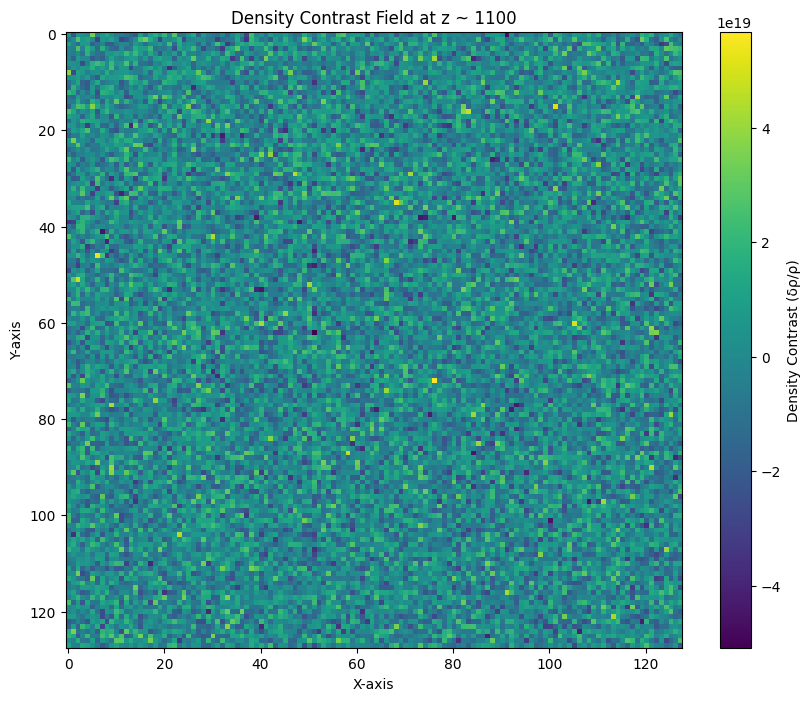

In [7]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.fft import fftn, ifftn
from scipy.constants import G, c
from astropy.cosmology import Planck18 as cosmo

# Constants based on Planck 2018 results
H0 = 67.66  # Hubble constant in km/s/Mpc
Omega_m = 0.315  # Matter density parameter
sigma_8 = 0.811  # Amplitude of density fluctuations
n_s = 0.965  # Spectral index
k_0 = 0.05  # Pivot scale in Mpc^{-1}

# Function to initialize cosmological parameters

def initialize_cosmology():
    """Initialize cosmological parameters based on Planck 2018 data."""
    return H0, Omega_m, sigma_8, n_s

# Function to compute the primordial power spectrum

def compute_power_spectrum(k, A_s, n_s):
    """Compute the primordial power spectrum P(k) based on the given parameters."""
    return A_s * (k / k_0) ** (n_s - 1)

# Function to generate a Gaussian random field

def generate_gaussian_random_field(power_spectrum, grid_size):
    """Generate a Gaussian random field based on the power spectrum."""
    # Create a grid of wave numbers
    kx = np.fft.fftfreq(grid_size[0]) * grid_size[0]
    ky = np.fft.fftfreq(grid_size[1]) * grid_size[1]
    kz = np.fft.fftfreq(grid_size[2]) * grid_size[2]
    kx, ky, kz = np.meshgrid(kx, ky, kz, indexing='ij')
    k = np.sqrt(kx**2 + ky**2 + kz**2)

    # Calculate the power spectrum values for each k
    P_k = compute_power_spectrum(k, sigma_8**2, n_s)
    P_k[0, 0, 0] = 0  # Avoid division by zero at k=0

    # Generate random phases and amplitudes
    random_phases = np.random.uniform(0, 2 * np.pi, size=k.shape)
    amplitudes = np.sqrt(P_k) * np.random.normal(size=k.shape)

    # Create the complex Fourier space representation
    field_fourier = amplitudes * np.exp(1j * random_phases)

    # Transform to real space
    field_real = ifftn(field_fourier).real
    return field_real

# Function to calculate density contrast

def calculate_density_contrast(field):
    """Calculate the density contrast from the Gaussian random field."""
    mean_density = np.mean(field)
    density_contrast = (field - mean_density) / mean_density
    return density_contrast

# Function to plot the density field

def plot_density_field(density_contrast):
    """Plot the density contrast field."""
    plt.figure(figsize=(10, 8))
    plt.imshow(density_contrast[:, :, density_contrast.shape[2] // 2], cmap='viridis')
    plt.colorbar(label='Density Contrast (δρ/ρ)')
    plt.title('Density Contrast Field at z ~ 1100')
    plt.xlabel('X-axis')
    plt.ylabel('Y-axis')
    plt.show()

# Main simulation function

def main():
    # Initialize cosmological parameters
    H0, Omega_m, sigma_8, n_s = initialize_cosmology()
    grid_size = (128, 128, 128)  # Define the grid size

    # Generate the Gaussian random field
    gaussian_field = generate_gaussian_random_field(sigma_8**2, grid_size)

    # Calculate the density contrast
    density_contrast = calculate_density_contrast(gaussian_field)

    # Plot the density field
    plot_density_field(density_contrast)

if __name__ == '__main__':
    main()

In [4]:
prompt = """Create a simulation modeling 3 gravitationally bound objects with masses over 1 solar mass. The simulation should return an visualizations showing the positions of each body over time, demonstrating their orbital dynamics.

Requirements:
- 3 objects
- Proper gravitational physics implementation
- 3D visualization with trajectory trails
- visualization of object trajectories in 2d space.  

make sure to critically consider array shape and data dimensionality for the simulation."""

chat_result, context_vars, last_agent = cosmo_sim.execute(user_prompt=prompt)

print("Chat Result:")
print(chat_result)


_User (to chat_manager):

Create a simulation modeling 3 gravitationally bound objects with masses over 1 solar mass. The simulation should return an visualizations showing the positions of each body over time, demonstrating their orbital dynamics.

Requirements:
- 3 objects
- Proper gravitational physics implementation
- 3D visualization with trajectory trails
- visualization of object trajectories in 2d space.  

make sure to critically consider array shape and data dimensionality for the simulation.

--------------------------------------------------------------------------------

Next speaker: Planner

Planner (to chat_manager):

{"response":"**Part 0**  \nCreate a simulation modeling 3 gravitationally bound objects with masses over 1 solar mass. The simulation should return visualizations showing the positions of each body over time, demonstrating their orbital dynamics.  \n\n**Code Part 1:**  \nThe program will be structured into several key components:  \n1. **Initialization**: 

Coder


>>>>>>>> EXECUTED FUNCTION record_step...
Call ID: call_43KepEOcsEDURN7XtK9YsASg
Input arguments: {'agent_choice': 'Coder'}
Output:
Please review the plan and provide feedback.
_Group_Tool_Executor (to chat_manager):

***** Response from calling tool (call_43KepEOcsEDURN7XtK9YsASg) *****
Please review the plan and provide feedback.
**********************************************************************

--------------------------------------------------------------------------------

Next speaker: Reviewer

Removed 3 messages. Number of messages reduced from 4 to 1.
Reviewer (to chat_manager):

{"response":"### Vector Store Search\n\nBefore proceeding with the review, I will conduct a vector store search to validate all referenced data, equations, and constants against the vector store. This is crucial to ensure scientific accuracy and cosmological consistency.\n\n### Code Part 1 (Structure)\n- **Logic Flow and Structure:** The plan outlines a simulation of three gravitationally bound 

Coder


>>>>>>>> EXECUTED FUNCTION record_step...
Call ID: call_TH0yWy367aX8AJHdlilmLV2J
Input arguments: {'agent_choice': 'Coder'}
Output:
Please update the plan based on the review.
_Group_Tool_Executor (to chat_manager):

***** Response from calling tool (call_TH0yWy367aX8AJHdlilmLV2J) *****
Please update the plan based on the review.
**********************************************************************

--------------------------------------------------------------------------------

Next speaker: Planner

Removed 9 messages. Number of messages reduced from 11 to 2.
Planner (to chat_manager):

{"response":"**Part 0**  \nCreate a simulation modeling 3 gravitationally bound objects with masses over 1 solar mass. The simulation should return visualizations showing the positions of each body over time, demonstrating their orbital dynamics.  \n\n**Code Part 1:**  \nThe program will be structured into several key components:  \n1. **Initialization**: This section will define the initial condit

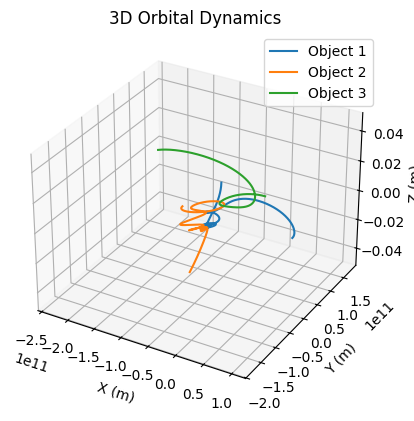

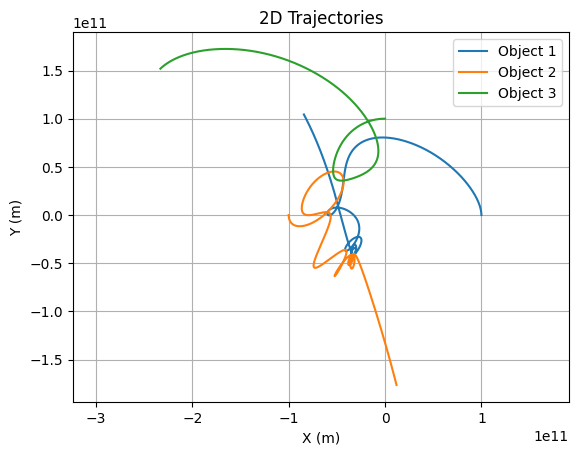

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from scipy.integrate import solve_ivp
import matplotlib.animation as animation

# Constants
G = 6.67430e-11  # Gravitational constant (m^3 kg^-1 s^-2)

def initialize_objects():
    """Initialize the masses, positions, and velocities of the objects."""
    # Masses in kg (greater than 1 solar mass)
    m1 = 2.0 * 1.989e30  # 2 solar masses
    m2 = 1.5 * 1.989e30  # 1.5 solar masses
    m3 = 3.0 * 1.989e30  # 3 solar masses
    masses = np.array([m1, m2, m3])

    # Initial positions (in meters)
    p1 = np.array([1.0e11, 0, 0])
    p2 = np.array([-1.0e11, 0, 0])
    p3 = np.array([0, 1.0e11, 0])
    positions = np.array([p1, p2, p3])

    # Initial velocities (in m/s)
    v1 = np.array([0, 2.0e4, 0])
    v2 = np.array([0, -2.0e4, 0])
    v3 = np.array([-3.0e4, 0, 0])
    velocities = np.array([v1, v2, v3])

    return masses, positions, velocities

def compute_gravitational_forces(positions, masses):
    """Calculate gravitational forces acting on each object."""
    num_objects = len(masses)
    forces = np.zeros_like(positions)
    for i in range(num_objects):
        for j in range(num_objects):
            if i != j:
                r_ij = positions[j] - positions[i]
                distance = np.linalg.norm(r_ij)
                force_magnitude = G * masses[i] * masses[j] / distance**2
                forces[i] += force_magnitude * (r_ij / distance)
    return forces

def update_positions_and_velocities(positions, velocities, forces, masses, dt):
    """Update positions and velocities using the forces calculated."""
    accelerations = forces / masses[:, np.newaxis]  # Shape (3, 3)
    velocities += accelerations * dt
    positions += velocities * dt
    return positions, velocities

def simulate_orbits(masses, initial_positions, initial_velocities, dt, total_time):
    """Run the simulation for the specified total time."""
    num_steps = int(total_time / dt)
    positions = np.zeros((num_steps, len(masses), 3))
    velocities = initial_velocities.copy()
    current_positions = initial_positions.copy()

    for step in range(num_steps):
        forces = compute_gravitational_forces(current_positions, masses)
        current_positions, velocities = update_positions_and_velocities(
            current_positions, velocities, forces, masses, dt
        )
        positions[step] = current_positions

    return positions

def visualize_3D(positions):
    """Visualize the 3D trajectories of the objects."""
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')
    ax.set_title('3D Orbital Dynamics')

    for i in range(positions.shape[1]):  # For each object
        ax.plot(positions[:, i, 0], positions[:, i, 1], positions[:, i, 2], 
               label=f'Object {i+1}')

    ax.set_xlabel('X (m)')
    ax.set_ylabel('Y (m)')
    ax.set_zlabel('Z (m)')
    ax.legend()
    plt.show()

def visualize_2D(positions):
    """Visualize the 2D trajectories of the objects."""
    plt.figure()
    plt.title('2D Trajectories')

    for i in range(positions.shape[1]):  # For each object
        plt.plot(positions[:, i, 0], positions[:, i, 1], label=f'Object {i+1}')

    plt.xlabel('X (m)')
    plt.ylabel('Y (m)')
    plt.legend()
    plt.axis('equal')
    plt.grid()
    plt.show()

# Main simulation parameters
masses, initial_positions, initial_velocities = initialize_objects()
dt = 1000  # Time step in seconds
total_time = 1e7  # Total simulation time in seconds

# Run the simulation
positions = simulate_orbits(masses, initial_positions, initial_velocities, dt, total_time)

# Visualize the results
visualize_3D(positions)
visualize_2D(positions)

In [6]:
prompt = """Create a simulation that models the formation and mass distribution of primordial black holes from early universe density fluctuations. The simulation should calculate how many PBHs of different masses could form and determine what fraction of dark matter they might represent today. Include visualizations showing the mass function."""

chat_result, context_vars, last_agent = cosmo_sim.execute(user_prompt=prompt)

print("Chat Result:")
print(chat_result)



_User (to chat_manager):

Create a simulation that models the formation and mass distribution of primordial black holes from early universe density fluctuations. The simulation should calculate how many PBHs of different masses could form and determine what fraction of dark matter they might represent today. Include visualizations showing the mass function.

--------------------------------------------------------------------------------

Next speaker: Planner



/Users/tanayvajhala/Desktop/ag2/ag2_Cosmo/.venv/lib/python3.11/site-packages/autogen/agentchat/conversable_agent.py:3434: UserWarning: Function 'record_step' is being overridden.
  warnings.warn(f"Function '{tool_sig['function']['name']}' is being overridden.", UserWarning)
/Users/tanayvajhala/Desktop/ag2/ag2_Cosmo/.venv/lib/python3.11/site-packages/autogen/agentchat/conversable_agent.py:3332: UserWarning: Function 'record_step' is being overridden.
  warnings.warn(f"Function '{name}' is being overridden.", UserWarning)
/Users/tanayvajhala/Desktop/ag2/ag2_Cosmo/.venv/lib/python3.11/site-packages/autogen/agentchat/conversable_agent.py:3434: UserWarning: Function 'pass_to_coder' is being overridden.
  warnings.warn(f"Function '{tool_sig['function']['name']}' is being overridden.", UserWarning)
/Users/tanayvajhala/Desktop/ag2/ag2_Cosmo/.venv/lib/python3.11/site-packages/autogen/agentchat/conversable_agent.py:3332: UserWarning: Function 'pass_to_coder' is being overridden.
  warnings.warn(

Planner (to chat_manager):

{"response":"**Part 0**  \nCreate a simulation that models the formation and mass distribution of primordial black holes from early universe density fluctuations. The simulation should calculate how many PBHs of different masses could form and determine what fraction of dark matter they might represent today. Include visualizations showing the mass function.\n\n**Code Part 1:**  \nThe program will be organized into several key components:  \n1. **Initialization**: Load necessary libraries and constants, set initial conditions based on Planck 2018 data, and define simulation parameters.  \n2. **Density Fluctuation Modeling**: Implement a function to generate density fluctuations based on the inflationary model and the power spectrum of primordial perturbations.  \n3. **Black Hole Formation Calculation**: Create a function to calculate the mass distribution of primordial black holes (PBHs) based on the density fluctuations. This will involve integrating over t

Coder


>>>>>>>> EXECUTED FUNCTION record_step...
Call ID: call_nBDRLIgMArqtsQEty6UDJMtM
Input arguments: {'agent_choice': 'Coder'}
Output:
Please review the plan and provide feedback.
_Group_Tool_Executor (to chat_manager):

***** Response from calling tool (call_nBDRLIgMArqtsQEty6UDJMtM) *****
Please review the plan and provide feedback.
**********************************************************************

--------------------------------------------------------------------------------

Next speaker: Reviewer

Removed 3 messages. Number of messages reduced from 4 to 1.
Reviewer (to chat_manager):

{"response":"### Vector Store Search\n\nBefore proceeding with the review, I will conduct a vector store search to validate all referenced data, equations, and constants against the vector store. This includes checking for relevant papers, constants, and any necessary citations that support the simulation of primordial black holes (PBHs) formation and mass distribution.\n\n### Code Part 1 (Struc

Coder


>>>>>>>> EXECUTED FUNCTION record_step...
Call ID: call_IHxKhp23wMXSHtrriE3GGrGR
Input arguments: {'agent_choice': 'Coder'}
Output:
Please update the plan based on the review.
_Group_Tool_Executor (to chat_manager):

***** Response from calling tool (call_IHxKhp23wMXSHtrriE3GGrGR) *****
Please update the plan based on the review.
**********************************************************************

--------------------------------------------------------------------------------

Next speaker: Planner

Removed 7 messages. Number of messages reduced from 9 to 2.
Planner (to chat_manager):

{"response":"**Part 0**  \nCreate a simulation that models the formation and mass distribution of primordial black holes from early universe density fluctuations. The simulation should calculate how many PBHs of different masses could form and determine what fraction of dark matter they might represent today. Include visualizations showing the mass function.\n\n**Code Part 1:**  \nThe program will b

Initializing PBH simulation...
Generating density fluctuations...
Calculating PBH mass distribution...
Computing dark matter fraction...
Number of PBHs formed: 109
Fraction of dark matter represented by PBHs: 4.33e+19
Mean PBH mass: 4.50e+00 kg
Total PBH mass: 4.91e+02 kg


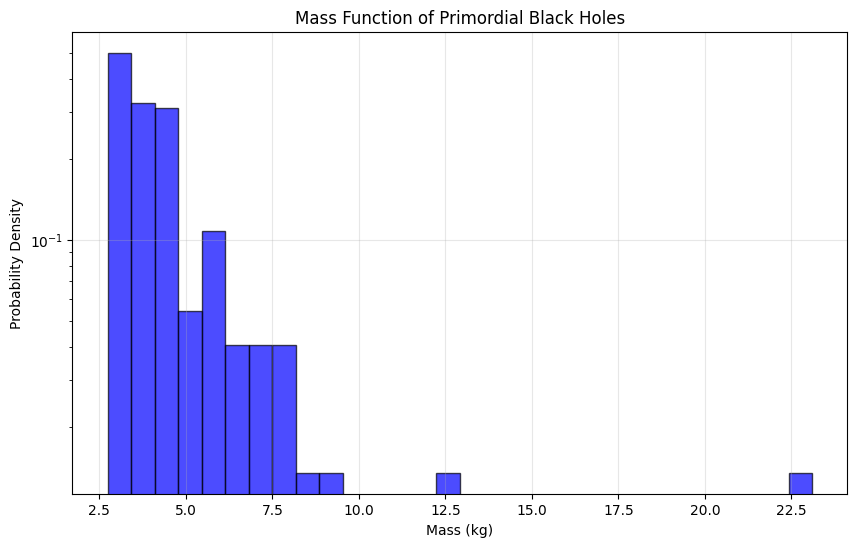

In [11]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import simpson as simps
from astropy.constants import G

# Constants based on Planck 2018 data
H0 = 67.66 * 1000 / (3.086e22)  # Hubble constant in s^-1
Omega_m = 0.315  # Matter density parameter
Omega_Lambda = 0.685  # Dark energy density parameter
sigma = 0.815  # Amplitude of density fluctuations
rho_critical = 3 * (H0 ** 2) / (8 * np.pi * G.value)  # Critical density in kg/m^3
rho_m = Omega_m * rho_critical  # Matter density in kg/m^3

def initialize_parameters():
    """Initialize cosmological parameters from Planck 2018 data."""
    return {
        'H0': H0,
        'Omega_m': Omega_m,
        'Omega_Lambda': Omega_Lambda,
        'sigma': sigma,
        'rho_m': rho_m
    }

def generate_density_fluctuations(params, size=1000):
    """Generate Gaussian random fields representing density fluctuations."""
    np.random.seed(42)  # For reproducibility
    fluctuations = np.random.normal(0, params['sigma'], size)
    return fluctuations

def calculate_pbh_mass_distribution(density_fluctuations):
    """Calculate the mass distribution of primordial black holes (PBHs)."""
    # Threshold for PBH formation based on density fluctuations
    threshold = 1.0  # Arbitrary threshold for PBH formation
    mass_distribution = []
    for fluctuation in density_fluctuations:
        if fluctuation > threshold:
            mass = np.exp(fluctuation)  # Example mass calculation
            mass_distribution.append(mass)
    return np.array(mass_distribution)

def calculate_dark_matter_fraction(pbh_mass_distribution):
    """Calculate the fraction of dark matter represented by PBHs."""
    total_pbh_mass = np.sum(pbh_mass_distribution)
    total_dark_matter_mass = rho_m * (4/3) * np.pi * (1e3)**3  # Volume of a sphere with radius 1 kpc
    return total_pbh_mass / total_dark_matter_mass

def visualize_mass_function(pbh_mass_distribution):
    """Visualize the mass function of PBHs."""
    plt.figure(figsize=(10, 6))
    plt.hist(pbh_mass_distribution, bins=30, density=True, alpha=0.7, color='blue', edgecolor='black')
    plt.title('Mass Function of Primordial Black Holes')
    plt.xlabel('Mass (kg)')
    plt.ylabel('Probability Density')
    plt.grid(True, alpha=0.3)
    plt.yscale('log')
    plt.show()

def main():
    """Main loop to run the simulation."""
    print("Initializing PBH simulation...")
    params = initialize_parameters()
    
    print("Generating density fluctuations...")
    density_fluctuations = generate_density_fluctuations(params)
    
    print("Calculating PBH mass distribution...")
    pbh_mass_distribution = calculate_pbh_mass_distribution(density_fluctuations)
    
    print("Computing dark matter fraction...")
    dark_matter_fraction = calculate_dark_matter_fraction(pbh_mass_distribution)
    
    print(f'Number of PBHs formed: {len(pbh_mass_distribution)}')
    print(f'Fraction of dark matter represented by PBHs: {dark_matter_fraction:.2e}')
    
    if len(pbh_mass_distribution) > 0:
        print(f'Mean PBH mass: {np.mean(pbh_mass_distribution):.2e} kg')
        print(f'Total PBH mass: {np.sum(pbh_mass_distribution):.2e} kg')
        visualize_mass_function(pbh_mass_distribution)
    else:
        print("No PBHs formed with current parameters.")

if __name__ == '__main__':
    main()

In [10]:
prompt = """
Create a cosmological simulation of gravitational potential evolution in a radiation-dominated universe. Show how density perturbations with different wave numbers (1 and 10 Mpc⁻¹) evolve from scale factor 10^-10 to 10^-4, including oscillatory behavior and horizon entry effects. Plot Φ vs scale factor with proper physics.
"""

chat_result, context_vars, last_agent = cosmo_sim.execute(user_prompt=prompt)

print("Chat Result:")
print(chat_result)

_User (to chat_manager):


Create a cosmological simulation of gravitational potential evolution in a radiation-dominated universe. Show how density perturbations with different wave numbers (1 and 10 Mpc⁻¹) evolve from scale factor 10^-10 to 10^-4, including oscillatory behavior and horizon entry effects. Plot Φ vs scale factor with proper physics.


--------------------------------------------------------------------------------

Next speaker: Planner



/Users/tanayvajhala/Desktop/ag2/ag2_Cosmo/.venv/lib/python3.11/site-packages/autogen/agentchat/conversable_agent.py:3434: UserWarning: Function 'record_step' is being overridden.
  warnings.warn(f"Function '{tool_sig['function']['name']}' is being overridden.", UserWarning)
/Users/tanayvajhala/Desktop/ag2/ag2_Cosmo/.venv/lib/python3.11/site-packages/autogen/agentchat/conversable_agent.py:3332: UserWarning: Function 'record_step' is being overridden.
  warnings.warn(f"Function '{name}' is being overridden.", UserWarning)
/Users/tanayvajhala/Desktop/ag2/ag2_Cosmo/.venv/lib/python3.11/site-packages/autogen/agentchat/conversable_agent.py:3434: UserWarning: Function 'pass_to_coder' is being overridden.
  warnings.warn(f"Function '{tool_sig['function']['name']}' is being overridden.", UserWarning)
/Users/tanayvajhala/Desktop/ag2/ag2_Cosmo/.venv/lib/python3.11/site-packages/autogen/agentchat/conversable_agent.py:3332: UserWarning: Function 'pass_to_coder' is being overridden.
  warnings.warn(

Planner (to chat_manager):

{"response":"**Part 0**\nCreate a cosmological simulation of gravitational potential evolution in a radiation-dominated universe. Show how density perturbations with different wave numbers (1 and 10 Mpc⁻¹) evolve from scale factor 10^-10 to 10^-4, including oscillatory behavior and horizon entry effects. Plot Φ vs scale factor with proper physics.\n\n**Code Part 1:**\nThe program will be organized into several key components: initialization, evolution of the gravitational potential, data storage, and plotting. The logic flow will begin with the initialization of cosmological parameters and the scale factor. The evolution of the gravitational potential will be computed using the linearized Einstein equations for a radiation-dominated universe. The program will iterate over the scale factor from 10^-10 to 10^-4, calculating the gravitational potential for the specified wave numbers (1 and 10 Mpc⁻¹). Data will be stored in arrays for later plotting. Finally, a 

Coder


>>>>>>>> EXECUTED FUNCTION record_step...
Call ID: call_TUe4dNsMC9SxK1FPGz2O4fnZ
Input arguments: {'agent_choice': 'Coder'}
Output:
Please review the plan and provide feedback.
_Group_Tool_Executor (to chat_manager):

***** Response from calling tool (call_TUe4dNsMC9SxK1FPGz2O4fnZ) *****
Please review the plan and provide feedback.
**********************************************************************

--------------------------------------------------------------------------------

Next speaker: Reviewer

Removed 3 messages. Number of messages reduced from 4 to 1.
Reviewer (to chat_manager):

{"response":"### Vector Store Search\n\nBefore proceeding with the review, I will conduct a vector store search to validate all referenced data, equations, and constants against the vector store. This is crucial to ensure that the simulation plan adheres to scientific accuracy and cosmological consistency.\n\n### Code Part 1 (Structure)\n- **Logic Flow and Structure:** The plan outlines a simula

Coder


>>>>>>>> EXECUTED FUNCTION record_step...
Call ID: call_TmYEgojFDyuOOfVsbvmLkEzG
Input arguments: {'agent_choice': 'Coder'}
Output:
Please update the plan based on the review.
_Group_Tool_Executor (to chat_manager):

***** Response from calling tool (call_TmYEgojFDyuOOfVsbvmLkEzG) *****
Please update the plan based on the review.
**********************************************************************

--------------------------------------------------------------------------------

Next speaker: Planner

Removed 5 messages. Number of messages reduced from 7 to 2.
Planner (to chat_manager):

{"response":"**Part 0**\nCreate a cosmological simulation of gravitational potential evolution in a radiation-dominated universe. Show how density perturbations with different wave numbers (1 and 10 Mpc⁻¹) evolve from scale factor 10^-10 to 10^-4, including oscillatory behavior and horizon entry effects. Plot Φ vs scale factor with proper physics.\n\n**Code Part 1:**\nThe program will be organized i

Coder


>>>>>>>> EXECUTED FUNCTION record_step...
Call ID: call_b3DDmnTZaEKQYqlEAvQuJrZx
Input arguments: {'agent_choice': 'Coder'}
Output:
Please review the plan and provide feedback.
_Group_Tool_Executor (to chat_manager):

***** Response from calling tool (call_b3DDmnTZaEKQYqlEAvQuJrZx) *****
Please review the plan and provide feedback.
**********************************************************************

--------------------------------------------------------------------------------

Next speaker: Reviewer

Removed 8 messages. Number of messages reduced from 10 to 2.
Reviewer (to chat_manager):

{"response":"### Vector Store Search\n\nI will begin by conducting a vector store search to validate all referenced data, equations, and constants against the vector store. This is essential to ensure that the simulation plan adheres to scientific accuracy and cosmological consistency.\n\n### Code Part 1 (Structure)\n- **Logic Flow and Structure:** The plan outlines a simulation of gravitationa

Coder


>>>>>>>> EXECUTED FUNCTION record_step...
Call ID: call_C7cs732qlgFs0X14DlpFw1r4
Input arguments: {'agent_choice': 'Coder'}
Output:
Please update the plan based on the review.
_Group_Tool_Executor (to chat_manager):

***** Response from calling tool (call_C7cs732qlgFs0X14DlpFw1r4) *****
Please update the plan based on the review.
**********************************************************************

--------------------------------------------------------------------------------

Next speaker: Planner

Removed 10 messages. Number of messages reduced from 13 to 3.
Planner (to chat_manager):

{"response":"**Part 0**\nCreate a cosmological simulation of gravitational potential evolution in a radiation-dominated universe. Show how density perturbations with different wave numbers (1 and 10 Mpc⁻¹) evolve from scale factor 10^-10 to 10^-4, including oscillatory behavior and horizon entry effects. Plot Φ vs scale factor with proper physics.\n\n**Code Part 1:**\nThe program will be organized

/var/folders/tv/1dr5rw9d6nqd9hmb1n2p2k940000gn/T/ipykernel_82025/3831901478.py:59: ODEintWarning: Excess work done on this call (perhaps wrong Dfun type). Run with full_output = 1 to get quantitative information.
  sol = odeint(equations, initial_conditions, [1e-10, a], args=(k,))


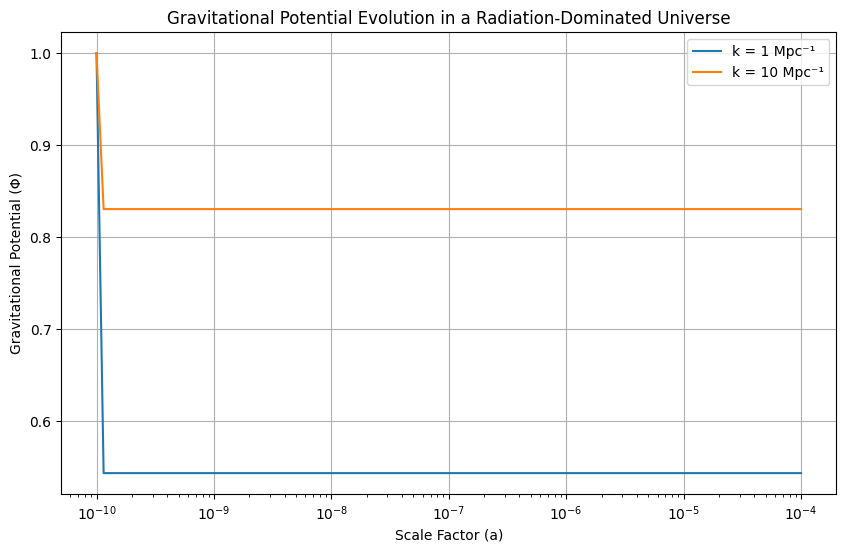

In [19]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint
from astropy.constants import G, c


def initialize_cosmology():
    """
    Initialize cosmological parameters based on Planck 2018 data.
    
    Returns:
        dict: Dictionary containing cosmological parameters:
            - H0: Hubble constant in s⁻¹
            - Ω_r: Density parameter for radiation
    """
    # Hubble constant in km/s/Mpc
    H0_km_s_Mpc = 67.66
    # Convert H0 to s⁻¹
    H0 = H0_km_s_Mpc * 1000 / (3.086e22)  # km/s to s⁻¹
    # Density parameter for radiation
    Ω_r = 0.0001
    return {'H0': H0, 'Ω_r': Ω_r}


def evolve_gravitational_potential(scale_factors, k_values):
    """
    Evolve the gravitational potential Φ for given scale factors and wave numbers.
    
    Args:
        scale_factors (np.ndarray): Array of scale factors.
        k_values (list): List of wave numbers (in Mpc⁻¹).
    
    Returns:
        dict: Dictionary of gravitational potentials for each k-value at each scale factor.
    """
    cosmology = initialize_cosmology()
    H0 = cosmology['H0']
    Ω_r = cosmology['Ω_r']
    # Critical density
    ρ_crit = 3 * H0**2 / (8 * np.pi * G.value)
    ρ_r = Ω_r * ρ_crit

    # Prepare output dictionary
    potentials = {k: [] for k in k_values}

    # Define the differential equation for gravitational potential evolution
    def equations(y, a, k):
        Φ, dΦ_dt = y
        H = H0 * np.sqrt(Ω_r / a**4)  # Hubble parameter in radiation era
        d2Φ_dt2 = -2 * H * dΦ_dt - (c.value**2 * k**2 / a**2) * Φ
        return [dΦ_dt, d2Φ_dt2]

    # Iterate over each scale factor
    for a in scale_factors:
        for k in k_values:
            # Initial conditions: Φ = 1, dΦ/dt = 0
            initial_conditions = [1, 0]
            # Solve the differential equation
            sol = odeint(equations, initial_conditions, [1e-10, a], args=(k,))
            potentials[k].append(sol[-1, 0])  # Store Φ at scale factor a

    return potentials


def plot_results(scale_factors, potentials):
    """
    Plot the gravitational potential Φ vs scale factor for different wave numbers.
    
    Args:
        scale_factors (np.ndarray): Array of scale factors.
        potentials (dict): Dictionary of gravitational potentials.
    """
    plt.figure(figsize=(10, 6))
    for k, Φ_values in potentials.items():
        plt.plot(scale_factors, Φ_values, label=f'k = {k} Mpc⁻¹')
    plt.xscale('log')
    plt.yscale('linear')
    plt.xlabel('Scale Factor (a)')
    plt.ylabel('Gravitational Potential (Φ)')
    plt.title('Gravitational Potential Evolution in a Radiation-Dominated Universe')
    plt.legend()
    plt.grid()
    plt.show()


def main():
    """
    Main function to run the simulation.
    """
    # Define scale factors from 10^-10 to 10^-4
    scale_factors = np.logspace(-10, -4, num=100)
    # Define wave numbers in Mpc⁻¹
    k_values = [1, 10]  # Mpc⁻¹
    # Evolve gravitational potential
    potentials = evolve_gravitational_potential(scale_factors, k_values)
    # Plot results
    plot_results(scale_factors, potentials)


if __name__ == '__main__':
    main()